#K-Nearest Neighbour (KNN) Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K-NN algorithm.


**How does K-NN work?**

The K-NN working can be explained on the basis of the below algorithm:

* Step-1: Select the number K of the neighbours

* Step-2: Calculate the Euclidean distance of K number of neighbours

* Step-3: Take the K nearest neighbours as per the calculated Euclidean distance.

* Step-4: Among these k neighbours, count the number of the data points in each category.

* Step-5: Assign the new data points to that category for which the number of the neighbour is maximum.

* Step-6: Our model is ready.


Euclidian distence=$$d = \sqrt{(x_2x_1)^2 + (y_2y_1)^2}$$


 mahapten distence= $$d = |x_2x_1| + |y_2 - y_1|$$

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

x=np.array([[150,50], [155,55], [160,60], [161,59], [158,65]])

y=np.array(['Medium', 'Medium', 'Large', 'Large', 'Large'])

test_point=np.array([[157,54]])

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(x,y)
prediction=knn.predict(test_point)
print(f'The predicted targect for Height=157 and weight=54 is:{prediction[0]}')



The predicted targect for Height=157 and weight=54 is:Large


In [ ]:
#importing necessory libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_breast_cancer


In [ ]:
#read cancer data
cancer=load_breast_cancer()

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
df['target']=pd.Series(cancer['target'])

In [ ]:
df= pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target']=pd.Series(cancer['target'])
# or df['target']=pd.Series(cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


**EDA**

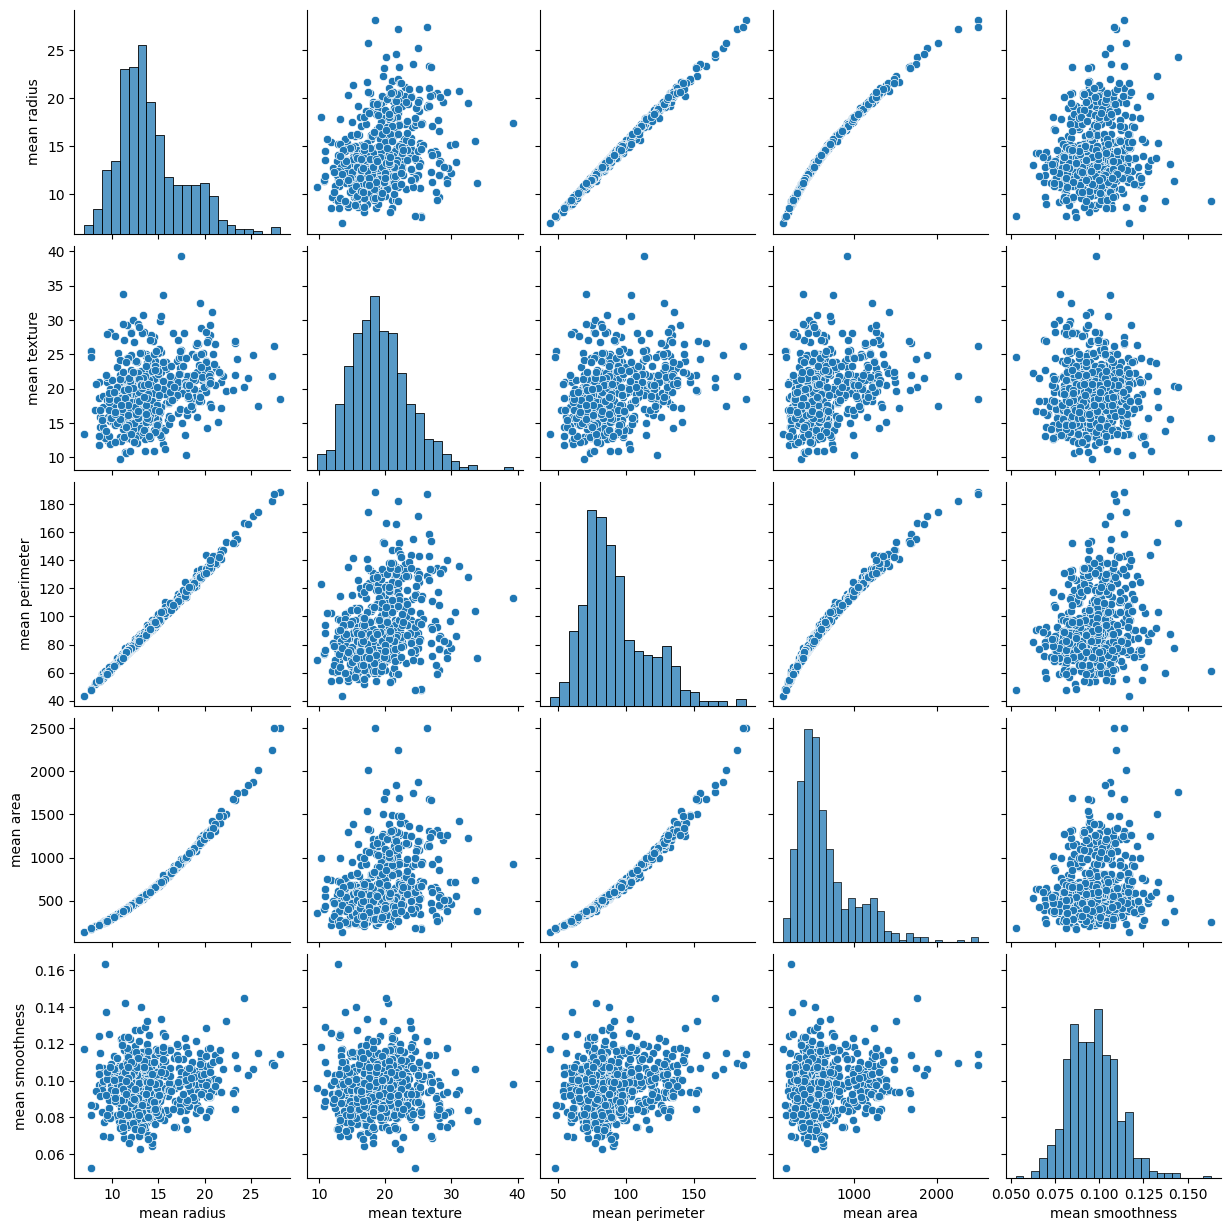

In [ ]:
df_subset= df[['mean radius','mean texture','mean perimeter','mean area','mean smoothness']]
sns.pairplot(df_subset)
plt.show()

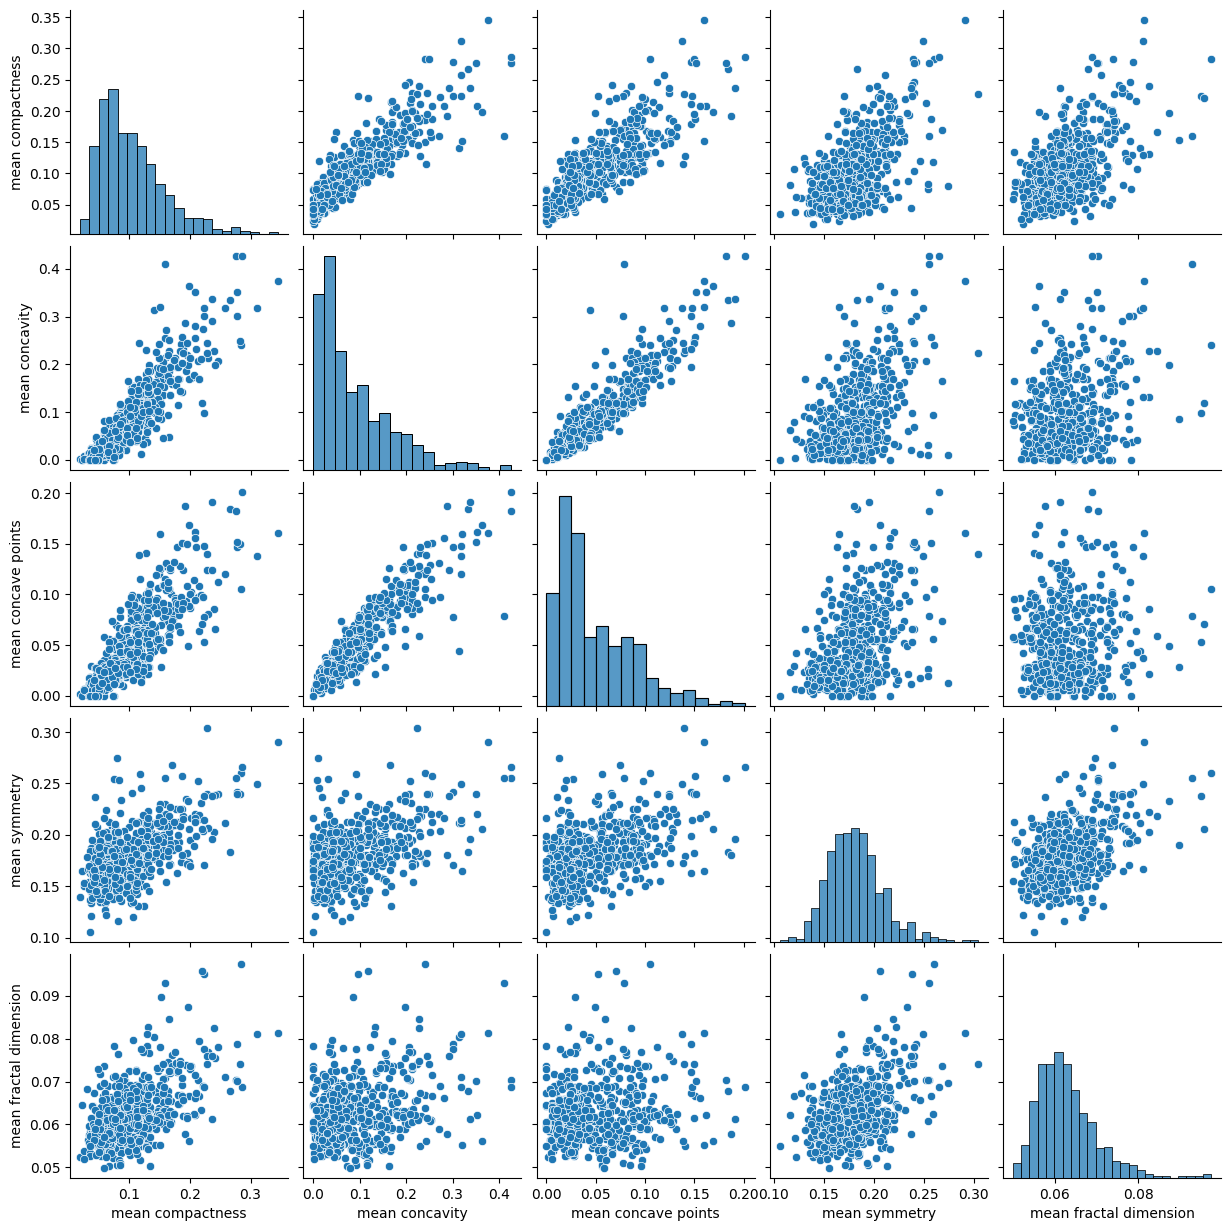

In [ ]:
sns.pairplot(df[['mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension']])
plt.show()

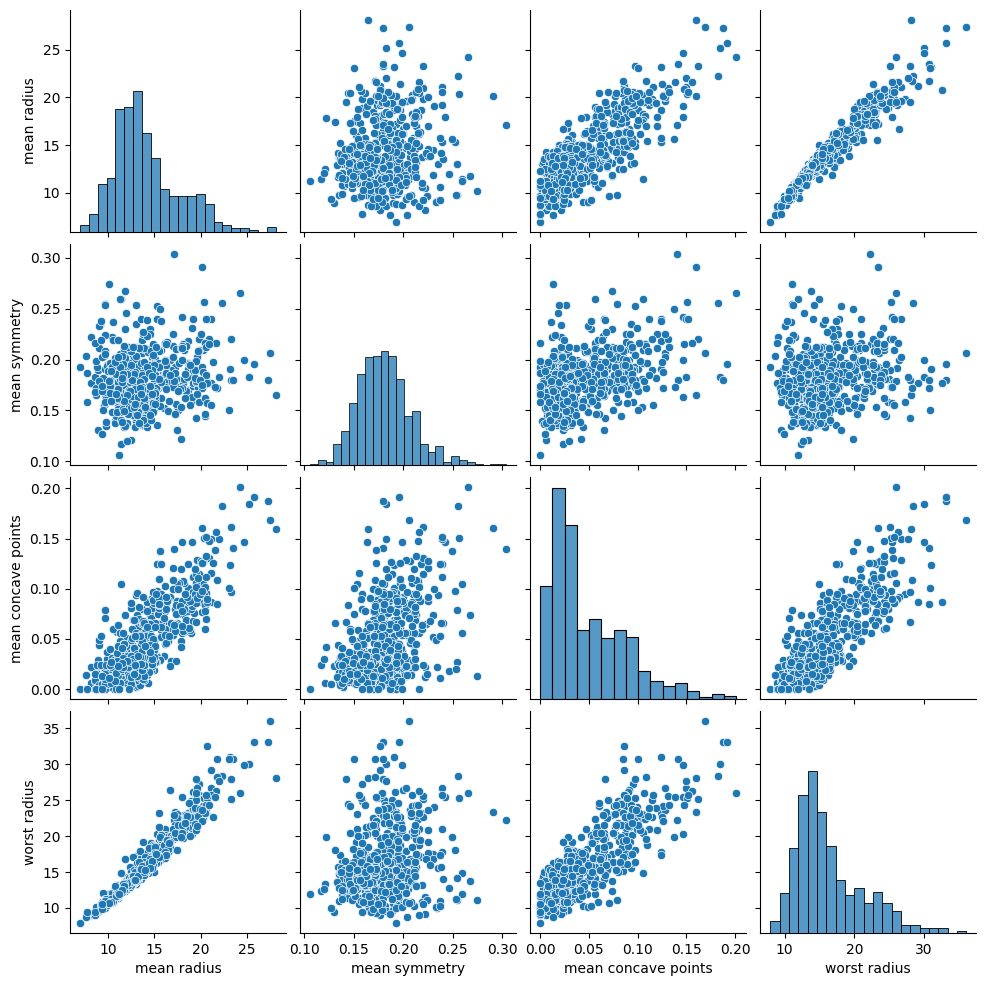

In [ ]:
sns.pairplot(df[['mean radius','mean symmetry','mean concave points', 'worst radius']])
plt.show()

In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [ ]:
df.shape

(569, 31)

In [ ]:
#or
print(f'no of rows: {df.shape[0]}')
print(f'no of columns: {df.shape[1]}')

no of rows: 569
no of columns: 31


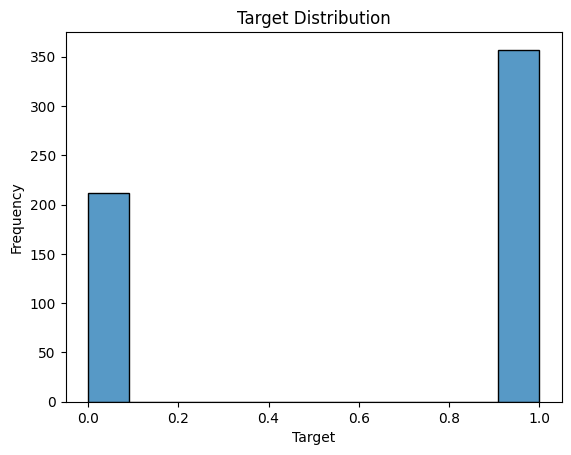

In [ ]:
sns.histplot(df['target'])
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [ ]:
correlation_matrix= df.corr()
correlation_matrix


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


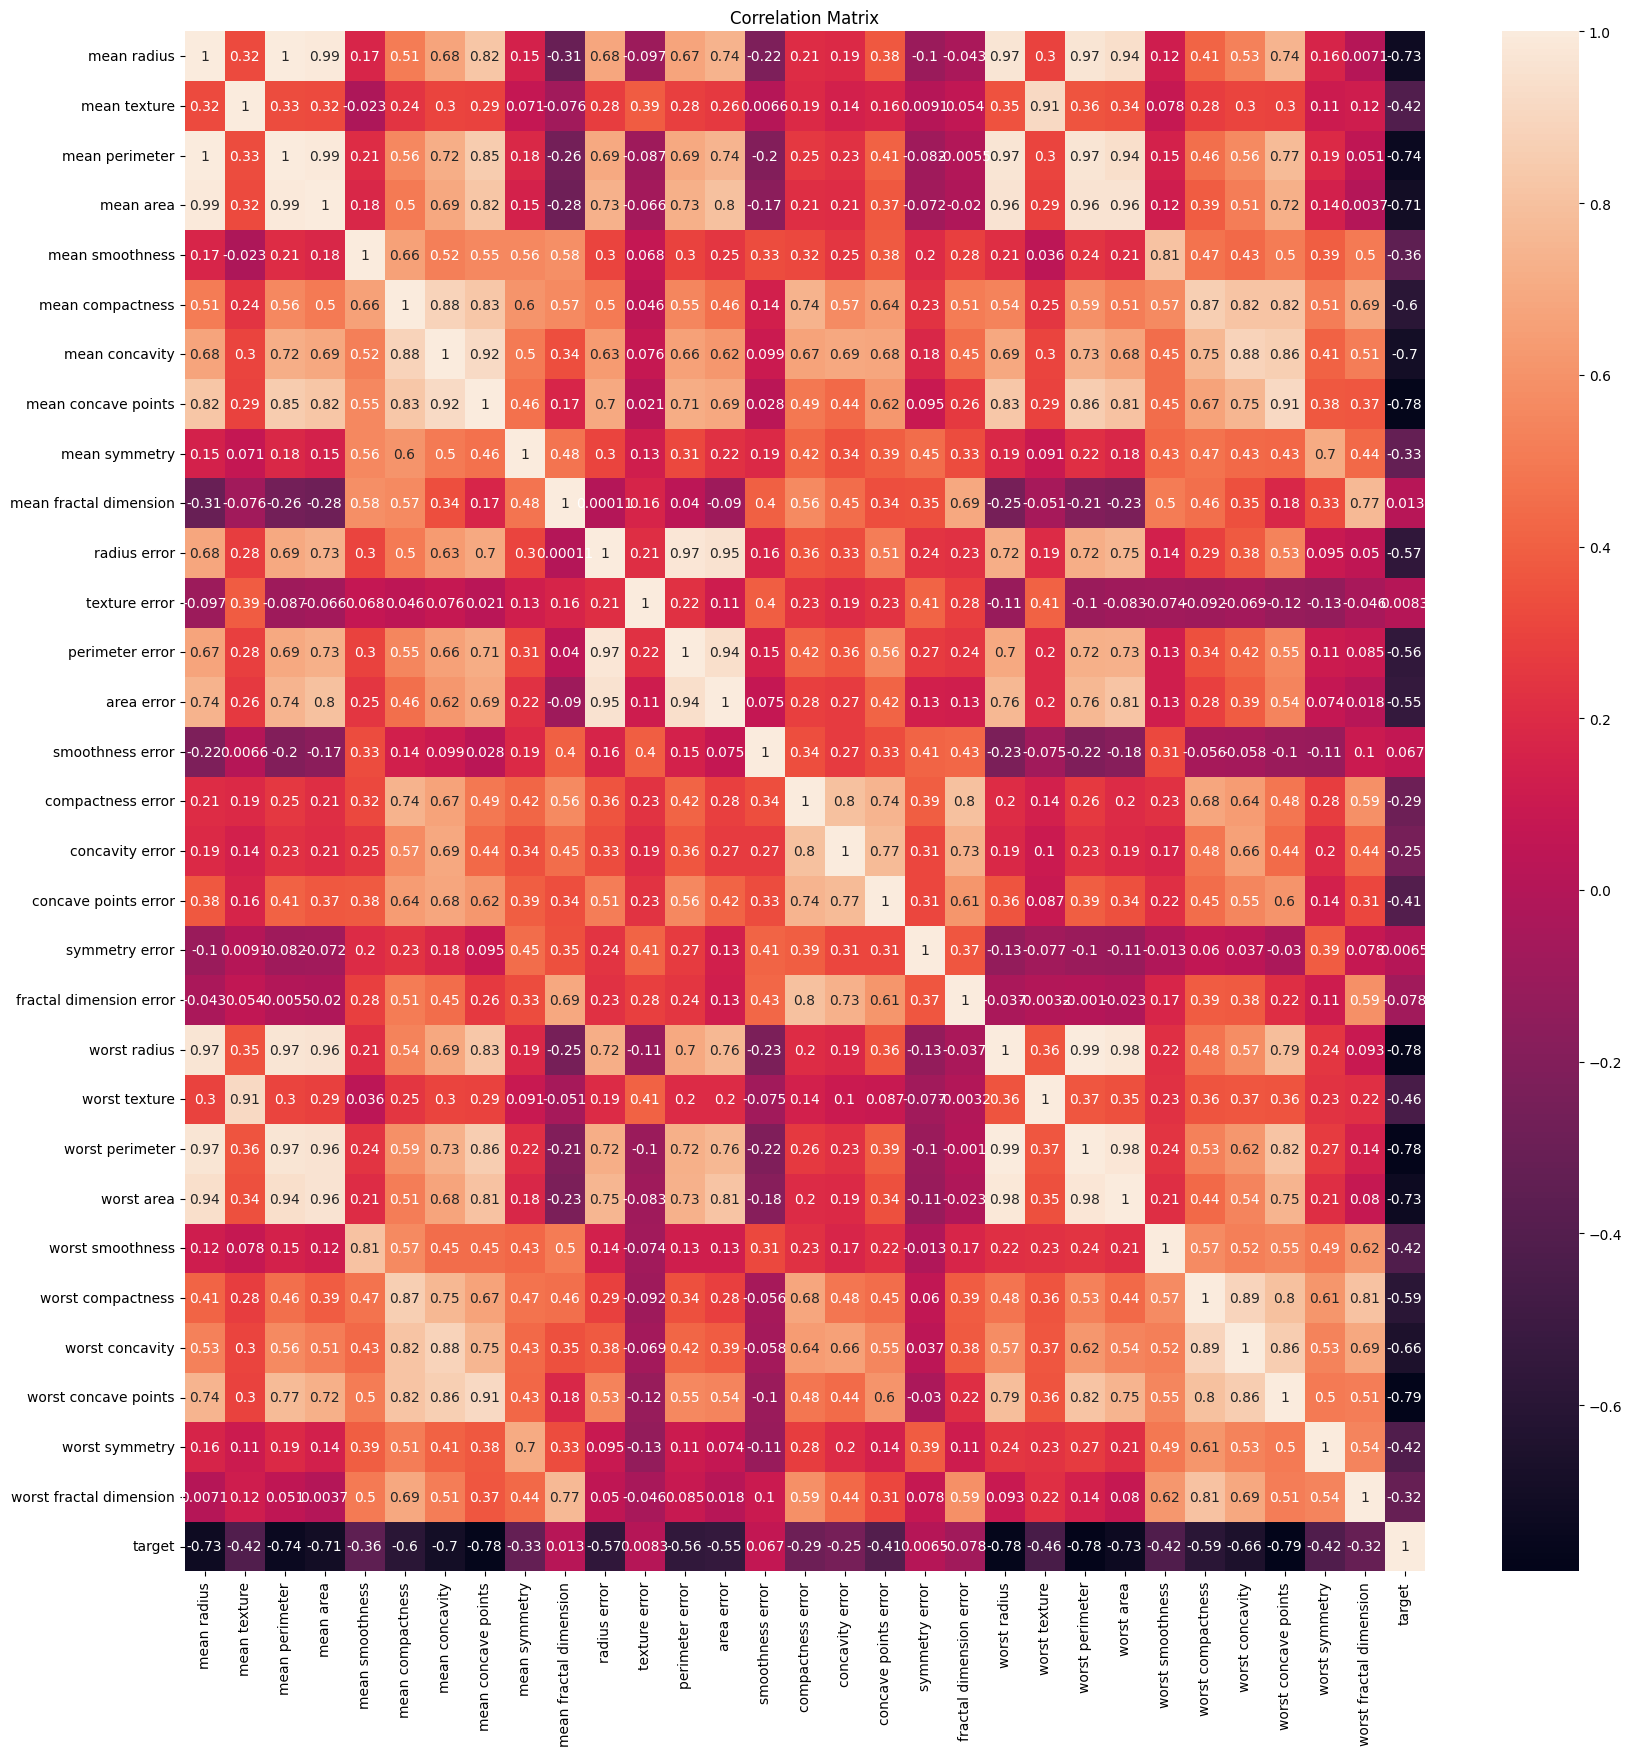

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop('target', axis=1)     #feature
y= df['target']                 #target
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)   #train test split
print("shape of train data", X_train.shape)
print("shape of test data", X_test.shape)
print("shape of target train data", y_train.shape)
print("shape of target test data", y_test.shape)

shape of train data (426, 30)
shape of test data (143, 30)
shape of target train data (426,)
shape of target test data (143,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(y_pred)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]


In [ ]:
print(f"Train score: {knn.score(X_train, y_train)}")
print(f"Test score: {knn.score(X_test, y_test)}")

Train score: 0.9812206572769953
Test score: 0.965034965034965


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[52  2]
 [ 3 86]]


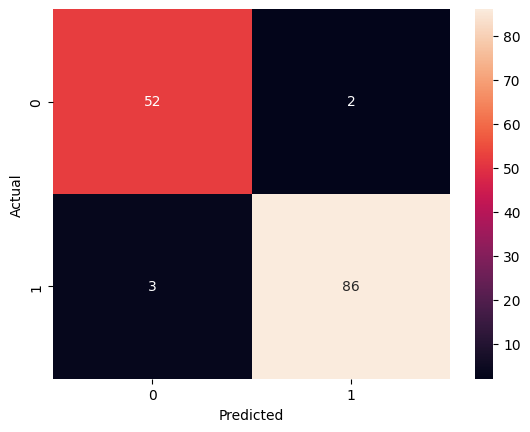

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
#Accuracy store
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.965034965034965